# Data Preparation

In [ ]:
import sys, os, re, json  # standard libraries for OS and regex processing and JSON handling
import nltk  # library for natural language processing tasks
import numpy as np  # numerical computing library
import pandas as pd  # library for working with tabular data
import matplotlib.pyplot as plt  # library for creating plots
import seaborn as sn  # library for making plots more attractive
from collections import defaultdict, Counter  # useful data structures for counting and dictionaries
from typing import List, Tuple, Dict  # library for type hints


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
path = "/content/drive/MyDrive/ProgettiDataScience-SAD/2ANNO1SEMESTRE/TEXT MINING AND SEARCH/Poterti Sanvito/Progetto TextMining/BalancedData.csv"
df = pd.read_csv(path)

In [ ]:
df

,comment_count,game_id,language,last_played,num_games_owned,num_reviews,playtime_forever,playtime_last_two_weeks,received_for_free,recommendationid,...,steamid,timestamp_created,timestamp_updated,voted_up,votes_funny,votes_up,weighted_vote_score,written_during_early_access,cleaned,num_words
0,0,10,english,1.514731e+09,276,18,34.0,0.0,False,41102772,...,76561198182268309,2018-03-28 07:42:25,2018-03-28 22:13:11,False,6,1,0.458333,False,non work,2
1,0,10,english,1.521841e+09,11,1,1135.0,4.0,False,40847648,...,76561198404041752,2018-03-16 12:39:02,2018-03-16 12:39:02,False,5,0,0.476190,False,open,1
2,0,10,english,1.515403e+09,26,1,9.0,0.0,False,40844189,...,76561198443134412,2018-03-16 08:28:17,2018-03-16 08:28:17,False,5,0,0.000000,False,da,1
3,0,10,english,1.521449e+09,3,1,24.0,2.0,False,40687337,...,76561198821183500,2018-03-09 16:48:35,2018-03-09 16:48:35,False,7,0,0.000000,False,allow bot abl connect lan,5
4,0,10,english,1.521908e+09,12,4,318.0,83.0,False,40628123,...,76561198297750864,2018-03-07 11:35:17,2018-03-15 19:16:07,False,6,1,0.476510,False,fuck piec shit fuck gaben wish famili die canc...,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2552334,0,304650,english,1.505167e+09,98,7,2023.0,0.0,False,28108932,...,76561197996226121,2016-11-30 23:19:05,2016-11-30 23:19:05,True,5,0,0.000000,False,fantast great stori immers good write videogam,7
2552335,0,359550,english,1.470479e+09,47,2,2504.0,0.0,False,19721999,...,76561198042825765,2015-12-16 00:59:43,2015-12-16 00:59:43,True,5,0,0.000000,False,good cod fag,3
2552336,0,232090,english,1.450579e+09,17,1,3053.0,0.0,False,15505064,...,76561198127726205,2015-04-23 15:56:18,2015-04-23 17:57:04,True,5,1,4.990025,True,rain boss kill life,4
2552337,0,105600,english,1.520809e+09,43,6,46565.0,0.0,False,21754094,...,76561198106314047,2016-03-10 20:50:19,2016-03-10 20:50:19,True,5,0,0.000000,False,awesom,1


In [ ]:
# set the backend of matplotlib to the 'inline' backend, so that plots are displayed inline in the notebook
%matplotlib inline  
nltk.download('stopwords')  # download NLTK's list of stopwords
nltk.download('punkt')  # download NLTK's Punkt tokenizer
nltk.download('wordnet')  # download NLTK's WordNet lemmatizer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\danie\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\danie\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\danie\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

### Remove NULL values (for column review)

In [ ]:
df.isna().sum()

comment_count                  0
game_id                        0
language                       0
last_played                    0
num_games_owned                0
num_reviews                    0
playtime_forever               0
playtime_last_two_weeks        0
received_for_free              0
recommendationid               0
review                         0
steam_purchase                 0
steamid                        0
timestamp_created              0
timestamp_updated              0
voted_up                       0
votes_funny                    0
votes_up                       0
weighted_vote_score            0
written_during_early_access    0
cleaned                        0
num_words                      0
dtype: int64

In [ ]:
print(df['review'].isnull().any())

False


In [ ]:
print(df.review[df.review.isnull()])

Series([], Name: review, dtype: object)


## Data Distribution

### Check the distribution of the voted_up values

In [ ]:
df.voted_up.value_counts(normalize=False)

False    1278698
True     1273641
Name: voted_up, dtype: int64

In [ ]:
def plot_labels(df, title=None):
  # count the number of occurrences of each star rating in the DataFrame and normalize the counts to obtain the ratio of each star rating
  ds_labels = df["voted_up"].value_counts(normalize=True)
  # sort the Series by the index (i.e., the star ratings)
  ds_labels.sort_index(inplace=True)
  # create a new figure using matplotlib
  plt.figure(figsize=(4,3))
  # plot the ds_labels Series as a bar plot
  ax = ds_labels.plot(kind="bar")
  # label the x-axis as "Stars"
  ax.set_xlabel("voted_up")
  # label the y-axis as "Ratio"
  ax.set_ylabel("Ratio")
  # if a title is provided, save the plot as an EPS file using the title as the file name
  if title is not None:
    plt.savefig(title + ".eps")
  # display the plot using matplotlib
  plt.show()


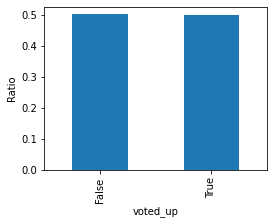

In [ ]:
plot_labels(df, "voted_up")

## Operations of removal

### Remove Links

In [ ]:
def remove_links(text):
  # Removing all the occurrences of links that starts with https
  remove_https = re.sub(r'http\S+', ' ', text)
  # Remove all the occurrences of text that ends with .com
  remove_com = re.sub(r"www\.[A-Za-z]*\.com", " ", remove_https)
  return remove_com

In [ ]:
df['reviewclean'] = df['review'].apply(lambda x: remove_links(x))

### Remove HTML tags

In [ ]:
from bs4 import BeautifulSoup 

def strip_html_tags(text):
    # Initiating BeautifulSoup object soup.
    soup = BeautifulSoup(text, "html.parser")
    # Get all the text other than html tags.
    stripped_text = soup.get_text(separator=" ")
    return stripped_text

In [ ]:
df['reviewclean'] = df['reviewclean'].apply(lambda x: strip_html_tags(x))

c:\Users\danie\anaconda3\lib\site-packages\bs4\__init__.py:435: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  warnings.warn(
c:\Users\danie\anaconda3\lib\site-packages\bs4\builder\__init__.py:545: XMLParsedAsHTMLWarning: It looks like you're parsing an XML document using an HTML parser. If this really is an HTML document (maybe it's XHTML?), you can ignore or filter this warning. If it's XML, you should know that using an XML parser will be more reliable. To parse this document as XML, make sure you have the lxml package installed, and pass the keyword argument `features="xml"` into the BeautifulSoup constructor.
  warnings.warn(


### Remove emoji/ symbols like :)

In [ ]:
df['reviewclean'] = df['reviewclean'].replace(r':\]|:\)|:\D', 'good', regex=True)

### Remove punctuation and other symbols, but it keeps apostrophes

In [ ]:
def remove_special_characters_and_digits(text):
    # Define a regular expression pattern to match any non-alphabetic character
    pattern = r'[^a-zA-Z\s\']'

    # Replace the special characters and digits with an empty string
    text = re.sub(pattern, '', text)
    return text
    
df['reviewclean'] = df['reviewclean'].apply(remove_special_characters_and_digits)

### Remove Whitespaces


In [ ]:
df['reviewclean'][14]

'hackers are everywhere in nonvac protected servers\r\r\r\r\r\r\r\r\r\r\r\r\nalso you gotta learn spanish before you play coz everyone speaks spanish and idk why\r\r\r\r\r\r\r\r\r\r\r\r\nyou are going to suffer super high ping if you play in the us coz lots of servers are not in america\r\r\r\r\r\r\r\r\r\r\r\r\n\r\r\r\r\r\r\r\r\r\r\r\r\noverall  was the legend but now it is a piece of bullhit'

In [ ]:
df['reviewclean'][23]

'hello and welcome\r\r\r\r\r\r\r\r\r\r\r\r\non this inciteful review i shall provide the unknowledge one such as yourself information this is a game it is not very good but regardless it is a game\r\r\r\r\r\r\r\r\r\r\r\r\nmy expierencegood\r\r\r\r\r\r\r\r\r\r\r\nwoke up in a room with  people next to me they look around and buy guns and so i follow their lead\r\r\r\r\r\r\r\r\r\r\r\r\ni bought the avtomata kalashnikova  or cv the chinese budget verson which is  and not \r\r\r\r\r\r\r\r\r\r\r\r\ni walked down a corridor and got shot at so i ran back and cowered in the corner\r\r\r\r\r\r\r\r\r\r\r\r\nthen i proceeded to play counterstrike\r\r\r\r\r\r\r\r\r\r\r\r\nit was  a scary expierence'

In [ ]:
def remove_white_spaces(text):
    
    text = text.replace('\n', ' ').replace('\r', ' ')
    return text


df['reviewclean'] = df['reviewclean'].apply(remove_white_spaces)

In [ ]:
def remove_extra_spaces(text):
    # Replace multiple spaces with a single space
    text = ' '.join(text.split())
    return text

# Apply the function to the 'text' column
df['reviewclean'] = df['reviewclean'].apply(remove_extra_spaces)

In [ ]:
df['reviewclean'][14]

'hackers are everywhere in nonvac protected servers also you gotta learn spanish before you play coz everyone speaks spanish and idk why you are going to suffer super high ping if you play in the us coz lots of servers are not in america overall was the legend but now it is a piece of bullhit'

In [ ]:
df['reviewclean'][23]

'hello and welcome on this inciteful review i shall provide the unknowledge one such as yourself information this is a game it is not very good but regardless it is a game my expierencegood woke up in a room with people next to me they look around and buy guns and so i follow their lead i bought the avtomata kalashnikova or cv the chinese budget verson which is and not i walked down a corridor and got shot at so i ran back and cowered in the corner then i proceeded to play counterstrike it was a scary expierence'

### Lower case

In [ ]:
df['reviewclean'] = df['reviewclean'].apply(lambda x: x.lower())

### Expand contracted forms

In [ ]:
import re

# Define a function to expand all contracted forms in a string
def expand_contractions(text):
    # Define a dictionary of contracted forms and their expansions
    contractions = {
        "ain't": "am not",
        "aren't": "are not",
        "can't": "cannot",
        "can't've": "cannot have",
        "'cause": "because",
        "could've": "could have",
        "couldn't": "could not",
        "couldn't've": "could not have",
        "didn't": "did not",
        "doesn't": "does not",
        "don't": "do not",
        "hadn't": "had not",
        "hadn't've": "had not have",
        "hasn't": "has not",
        "haven't": "have not",
        "he'd": "he would",
        "he'd've": "he would have",
        "he'll": "he will",
        "he'll've": "he will have",
        "he's": "he is",
        "how'd": "how did",
        "how'd'y": "how do you",
        "how'll": "how will",
        "how's": "how is",
        "I'd": "I would",
        "I'd've": "I would have",
        "I'll": "I will",
        "I'll've": "I will have",
        "I'm": "I am",
        "I've": "I have",
        "isn't": "is not",
        "it'd": "it had",
        "it'd've": "it would have",
        "it'll": "it will",
        "it'll've": "it will have",
        "it's": "it is",
        "let's": "let us",
        "ma'am": "madam",
        "mayn't": "may not",
        "might've": "might have",
        "mightn't": "might not",
        "mightn't've": "might not have",
        "must've": "must have",
        "mustn't": "must not",
        "mustn't've": "must not have",
        "needn't": "need not",
        "needn't've": "need not have",
        "o'clock": "of the clock",
        "oughtn't": "ought not",
        "oughtn't've": "ought not have",
        "shan't": "shall not",
        "sha'n't": "shall not",
        "shan't've": "shall not have",
        "she'd": "she would",
        "she'd've": "she would have",
        "she'll": "she will",
        "she'll've": "she will have",
        "she's": "she is",
        "should've": "should have",
        "shouldn't": "should not",
        "shouldn't've": "should not have",
        "so've": "so have",
        "that's": "that is",
        "there's": "there is",
        "they'd": "they would",
        "they'll": "they will",
        "they're": "they are",
        "they've": "they have",
        "we'd": "we would",
        "we're": "we are",
        "we've": "we have",
        "weren't": "were not",
        "what'll": "what will",
        "what're": "what are"}

    for word in text.split():
        if word in contractions:
            text = text.replace(word, contractions[word])
    
    return text

In [ ]:
df['reviewclean'] = df['reviewclean'].apply(expand_contractions)

In [ ]:
def remove_apostrophes(text):
    # Define a regular expression pattern to match the apostrophe character
    pattern = r'\''

    # Replace the apostrophes with an empty string
    text = re.sub(pattern, '', text)
    return text

df['reviewclean'] = df['reviewclean'].apply(remove_apostrophes)

In [ ]:
text = "I'm not satisfied, it's,"
textnew = remove_special_characters_and_digits(text)
textnew = expand_contractions(textnew)
textnew = remove_apostrophes(textnew)

print(textnew)

I am not satisfied it is


### Remove repeated characters (Very goooooooood --> Very good)

In [ ]:
def character_repeatation(text):
    # Pattern matching for all case alphabets
    # \1   It refers to the first capturing group.
    # {2,} It means we are matching for repetition that occurs more than two times (or equal).
    # r’\1\1' → It limits all the repetition to two characters.
    Pattern_alpha = re.compile(r"([A-Za-z])\1{2,}", re.DOTALL)
    # Limiting all the  repeatation to two characters.
    Formatted_text = Pattern_alpha.sub(r"\1\1", text) 
    # Pattern matching for all the punctuations that can occur
    Pattern_Punct = re.compile(r'([.,/#!$%^&*?;:{}=_`~()+-])\1{1,}')
    # Limiting punctuations in previously formatted string to only one.
    Combined_Formatted = Pattern_Punct.sub(r'\1', Formatted_text)
    return Combined_Formatted


In [ ]:
df['reviewclean'] = df['reviewclean'].apply(lambda x: character_repeatation(x))

### Tokenization



In [ ]:
def tokenization(text):
    return nltk.word_tokenize(text)

In [ ]:
df['reviewTextPreprocToken'] = df['reviewclean']

In [ ]:
df['reviewTextPreprocToken'] = df['reviewTextPreprocToken'].apply(tokenization)

In [ ]:
df.to_csv('BalancedData_Tokenized.csv', index=False)

### Remove stop words

In [ ]:
from nltk.corpus import stopwords

def remove_stopwords(tokenized_text):
  stop_words = set(stopwords.words('english'))
  tokenized_text_without_stopwords = []
  for token in tokenized_text:
    if token.lower() not in stop_words:
      tokenized_text_without_stopwords.append(token)
  return tokenized_text_without_stopwords

In [ ]:
df['reviewTextPreprocToken'] = df['reviewTextPreprocToken'].apply(remove_stopwords)

In [ ]:
df.to_csv('BalancedData_Tokenized_StopWord.csv', index=False)

### Stemming



In [ ]:
from nltk.stem import PorterStemmer

def stem_phrase(text):
  stemmer = PorterStemmer()
  stemmed_text = []
  for token in text:
     stem = stemmer.stem(token)
     stemmed_text.append(stem)
  return " ".join(stemmed_text)


In [ ]:
df['reviewclean'] = df['reviewTextPreprocToken'].apply(stem_phrase)

In [ ]:
df.to_csv('BalancedData_Tokenized_StopWord_Stemming.csv', index=False)

In [ ]:
df['reviewclean']

0                                               nonwork game
1                                                       open
2                                                         da
3            game doesnt allow play bot also abl connect lan
4          game fuck piec shit fuck gaben wish famili die...
                                 ...                        
2552334    fantast game great stori immers best write eve...
2552335                                    good game cod fag
2552336                             make rain boss kill life
2552337                                               awesom
2552338                man game awesom never felt good handl
Name: reviewclean, Length: 2552339, dtype: object

### Remove most frequent words

In [ ]:
from collections import Counter, defaultdict

threshold = 100000

def remove_frequent_words(strings, threshold):
  # Create a defaultdict for the word counts
  word_counts = defaultdict(int)
  for string in strings:
    for word in string.split():
      word_counts[word] += 1

  # Create a set of frequent words
  frequent_words = {word for word, count in word_counts.items() if count > threshold}

  # Use a generator expression to filter the strings
  filtered_strings = (
      ' '.join(word for word in string.split() if word not in frequent_words)
      for string in strings
  )

  return list(filtered_strings)

In [ ]:
df['reviewclean'] = remove_frequent_words(df['reviewclean'], threshold)

### Remove unfrequent words

In [ ]:
from collections import Counter

threshold = 10

def remove_unfrequent_words(strings, threshold):
 # Create a defaultdict for the word counts
  word_counts = defaultdict(int)
  for string in strings:
    for word in string.split():
      word_counts[word] += 1

  # Create a set of unfrequent words
  unfrequent_words = {word for word, count in word_counts.items() if count < threshold}

  # Use a generator expression to filter the strings
  filtered_strings = (
      ' '.join(word for word in string.split() if word not in unfrequent_words)
      for string in strings
  )

  return list(filtered_strings)

In [ ]:
df['reviewclean'] = remove_unfrequent_words(df['reviewclean'], threshold)

In [ ]:
df['reviewclean']

0                                        nonwork
1                                           open
2                                             da
3               doesnt allow bot abl connect lan
4          piec gaben wish famili cancer fat pig
                           ...                  
2552334            fantast immers write videogam
2552335                                  cod fag
2552336                           rain boss life
2552337                                   awesom
2552338                    man awesom felt handl
Name: reviewclean, Length: 2552339, dtype: object

# Create a new dataframe

In [ ]:
df.to_csv('BalancedData_Tokenized_StopWord_Stemmed_normalized.csv', index=False)

In [ ]:
df['word_count'] = df['reviewclean'].str.split().str.len()

# Remove rows where the 'word_count' is less than 10
df = df[df['word_count'] >= 10]

# Drop the 'word_count' column
df = df.drop(columns=['word_count'])

In [ ]:
df.voted_up.value_counts(normalize=False)

False    644860
True     459863
Name: voted_up, dtype: int64

In [ ]:
df.to_csv('BalancedData_Tokenized_StopWord_Stemmed_normalized_longreviews.csv', index=False)